<a href="https://colab.research.google.com/github/dhender77/Drake-Mens-Basketball-2022-23/blob/main/Project2_Henderson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name: Danny Henderson

Proposed Points (out of 25): 25

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

I want to predict a win/loss for Drake given game statistics for each player. It's a dataset of player game logs. It's about 150 rows of data. I'm not expecting the model to be very accurate. However, if the model ends up being pretty accurate, I'll be very interested to see how.

I'm curious to see if the model can pick up the importance of which player the line of data is from.

*your answer here*

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

*your answer here*

In [ ]:
# load and prepare your data here
#All of the data is numeric except for our target variable, which is binary. And player name, which I need to make into a dummy variable. 
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
data= pd.read_csv('/content/drive/MyDrive/CS 167/Player Log.csv')
data.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Player,Result,Min,FG,FGA,3P,3PA,FT,FTA,ORB,...,STL,PF,TO,PTS,Deflections,Fouls Drawn,Charges,ORB Allowed,Forced TOV,Points Allowed
0,Roman,W,18,3,7,1,3,2,2,0,...,2,3,1,9,1,1,1,1,2,4
1,Roman,W,23,4,10,1,1,3,3,0,...,0,3,2,12,1,2,0,0,0,6
2,Roman,W,18,0,4,0,0,0,1,0,...,0,3,2,0,0,2,1,2,2,1
3,Roman,W,28,4,7,1,2,5,6,0,...,0,5,2,14,1,4,1,1,2,8
4,Roman,W,23,1,5,0,2,4,4,0,...,0,1,3,6,0,4,1,0,1,10


In [ ]:
data.isna().any()
#No NA's

Player            False
Result            False
Min               False
FG                False
FGA               False
3P                False
3PA               False
FT                False
FTA               False
ORB               False
DRB               False
AST               False
BLK               False
STL               False
PF                False
TO                False
PTS               False
Deflections       False
Fouls Drawn       False
Charges           False
ORB Allowed       False
Forced TOV        False
Points Allowed    False
dtype: bool

In [ ]:
data = pd.get_dummies(data, columns=['Player'])
data.head()

,Result,Min,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,...,Points Allowed,Player_Brodie,Player_Conor,Player_DJ,Player_Eric,Player_Nate,Player_Roman,Player_Sardaar,Player_Sturtz,Player_Tucker
0,W,18,3,7,1,3,2,2,0,3,...,4,0,0,0,0,0,1,0,0,0
1,W,23,4,10,1,1,3,3,0,2,...,6,0,0,0,0,0,1,0,0,0
2,W,18,0,4,0,0,0,1,0,4,...,1,0,0,0,0,0,1,0,0,0
3,W,28,4,7,1,2,5,6,0,4,...,8,0,0,0,0,0,1,0,0,0
4,W,23,1,5,0,2,4,4,0,3,...,10,0,0,0,0,0,1,0,0,0


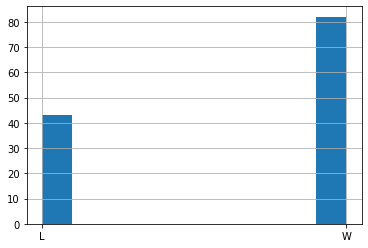

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


predictors = data.columns.drop('Result')
target = "Result"

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#Normalize Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
train_sln.hist()

# 3. Research

Put your code and your experiments here.

In [ ]:
# code goes here... don't forget to include graphs. Professor Urness loves graphs.
#I'll start with an SVM
from sklearn.svm import SVC
from sklearn import metrics
clf = SVC()
clf.fit(train_data,train_sln)
predictions = clf.predict(test_data)
print("Accuracy:", accuracy_score(test_sln, predictions))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "Actual " + vals, columns = "Pred " + vals))


Accuracy: 0.78125
          Pred W  Pred L
Actual W      25       0
Actual L       7       0


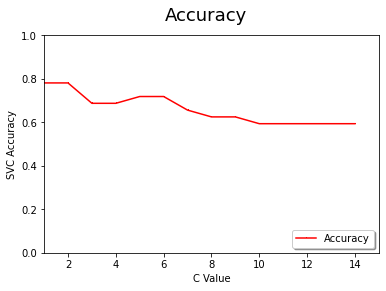

In [ ]:
x = 15
series = []
for i in range(1,x):
  clf = SVC(kernel = 'rbf', C = i)
  clf.fit(train_data,train_sln)
  predictions = clf.predict(test_data)
  val = accuracy_score(test_sln, predictions)
  series.append(val)

import matplotlib.pyplot as plt
%matplotlib inline
xvals = range(1, x)
plt.suptitle('Accuracy', fontsize=18)
plt.xlabel('C Value')
plt.ylabel('SVC Accuracy')
plt.plot(xvals, series, 'r,-', label='Accuracy')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, x, 0, 1])
plt.show()

In [ ]:
clf_t = SVC(kernel = 'rbf', C = 2 )
clf_t.fit(train_data,train_sln)
predictions = clf_t.predict(test_data)
print("Accuracy:", accuracy_score(test_sln, predictions))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "Actual " + vals, columns = "Pred " + vals))

#Well that didn't work

Accuracy: 0.78125
          Pred W  Pred L
Actual W      25       0
Actual L       7       0


In [ ]:
from sklearn.linear_model import Perceptron
import warnings
warnings.filterwarnings("ignore")
perc = Perceptron()
perc.fit(train_data,train_sln)
perc_predictions = perc.predict(test_data)

#output accuracy
print("Accuracy:", metrics.accuracy_score(test_sln, perc_predictions))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, perc_predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "Actual " + vals, columns = "Pred " + vals))

Accuracy: 0.53125
          Pred W  Pred L
Actual W      13      12
Actual L       3       4


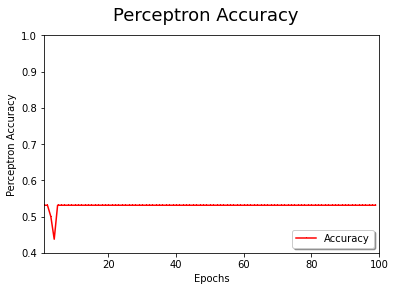

In [ ]:
x = 100
series1 = []
for i in range(1,x):
  perc = Perceptron(max_iter = i)
  perc.fit(train_data,train_sln)
  perc_predictions = perc.predict(test_data)
  val = metrics.accuracy_score(test_sln, perc_predictions)
  series1.append(val)

import matplotlib.pyplot as plt
%matplotlib inline
xvals = range(1, x)
plt.suptitle('Perceptron Accuracy', fontsize=18)
plt.xlabel('Epochs')
plt.ylabel('Perceptron Accuracy')
plt.plot(xvals, series1, 'r,-', label='Accuracy')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, x, .4, 1])
plt.show()

In [ ]:
perc = Perceptron(max_iter = 5)
perc.fit(train_data,train_sln)
perc_predictions = perc.predict(test_data)

#output accuracy
print("Accuracy:", metrics.accuracy_score(test_sln, perc_predictions))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, perc_predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "Actual " + vals, columns = "Pred " + vals))

#well that was even worse

Accuracy: 0.53125
          Pred W  Pred L
Actual W      17       8
Actual L       7       0


In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(train_data,train_sln)
sgd_predictions = sgd.predict(test_data)
print("Accuracy:", metrics.accuracy_score(test_sln, sgd_predictions ))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, sgd_predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "Actual " + vals, columns = "Pred " + vals))

Accuracy: 0.6875
          Pred W  Pred L
Actual W      18       7
Actual L       3       4


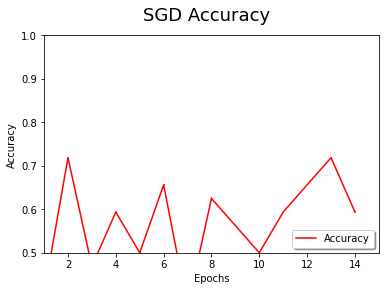

In [ ]:
x  = 15
series2 = []
for i in range(1,x):
  sgd = SGDClassifier(max_iter = i)
  sgd.fit(train_data,train_sln)
  sgd_predictions = sgd.predict(test_data)
  val = metrics.accuracy_score(test_sln, sgd_predictions )
  series2.append(val)

import matplotlib.pyplot as plt
%matplotlib inline
xvals = range(1, x)
plt.suptitle('SGD Accuracy', fontsize=18)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(xvals, series2, 'r,-', label='Accuracy')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, x, .5, 1])
plt.show()

In [ ]:
sgd = SGDClassifier(max_iter = 2)
sgd.fit(train_data,train_sln)
sgd_predictions = sgd.predict(test_data)
print("Accuracy:", metrics.accuracy_score(test_sln, sgd_predictions ))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, sgd_predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "Actual " + vals, columns = "Pred " + vals))

#Gives a different accuracy regardless of tuning
#I'll go with the SGD to run Principal component analysis over

Accuracy: 0.59375
          Pred W  Pred L
Actual W      14      11
Actual L       2       5


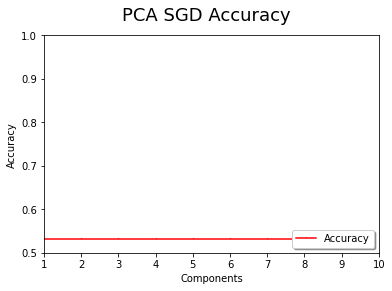

In [ ]:
from sklearn.decomposition import PCA

x = 10
series4 = []
for i in range(1,x):
  extractor = PCA(n_components= i, whiten=True)
  #When fitting with PCA, you do not use the target column - this is an unsupervised learning algorithm
  extractor.fit(train_data)
  train_transformed = extractor.transform(train_data)
  test_transformed = extractor.transform(test_data)
  sgd = SGDClassifier(max_iter = 2)
  sgd.fit(train_transformed,train_sln)
  sgd_predictions = sgd.predict(test_transformed)
  val = metrics.accuracy_score(test_sln, perc_predictions)
  series4.append(val)

import matplotlib.pyplot as plt
%matplotlib inline
xvals = range(1, x)
plt.suptitle('PCA SGD Accuracy', fontsize=18)
plt.xlabel('Components')
plt.ylabel('Accuracy')
plt.plot(xvals, series4, 'r,-', label='Accuracy')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, x, .5, 1])
plt.show()

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

*your answer here*

My analysis is that nothing worked at all. I think it's possible that things would be more accurate if there was more data. My read on these types of deep learning is that the point is to correctly predict something. I think my two projects have shown how unpredictable sports are, especially college basketball. Regardless of the conditions of a possession, or the game logs of individual player, you still can't predict such unpredictable outcomes. The SVM was the most accurate because it figured out the way to maximize accuracy was to just predict that the outcome was a win every time. This is smart on the machine's part, because we've won 13 out of our 19 games. I'd like to do data analytics in sports, and I think I've gathered from this class that you're probably not going to have very high accuracy predicting things in sports that involve human error and variability. Moving forward I'm going to try using the player as the target to see if I can prove a point to the coaches.

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

*your answer here*

The only challenge I really encountered was that tuning my models didn't improve anything. I overcame this by accepting why this was.